In [1]:
import pickle
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
file_name = "20190219_test.txt"
# file_name = "20200218_test.txt"
text = open("../dataset/quanzhou/od_flow/" + file_name, "r").read()
split_data = text.split("\n")[:-1]

r1 = [x.split('\t')[:-1] for x in split_data]

In [3]:
file_name = "20190219_test.txt"
# file_name = "20200218_test.txt"
text = open("../predict/quanzhou/93/" + file_name, "r").read()
split_data = text.split("\n")[:-1]

r2 = [x.split(' ') for x in split_data]

In [4]:
np.array(r1).shape, np.array(r2).shape

((85684, 96), (85684, 96))

In [5]:
r1 = np.array(r1)
r2 = np.array(r2)

In [8]:
c1 = Counter(r1[:, 95])
c2 = Counter(r2[:, 95])

In [11]:
file_name = "20190219_test.txt"
# file_name = "20200218_test.txt"
text = open("../dataset/quanzhou/od_flow/" + file_name, "r").read()
split_data = text.split("\n")[:-1]

round_truth = [x.split('\t')[:-1] for x in split_data]

In [12]:
rmse = [[np.nan] * 23 for _ in range(23)]
mae = [[np.nan] * 23 for _ in range(23)]
r = 0
for pre in range(93, 1, -4):
# for pre in range(93, 28, -4):
    text1 = open("../predict/quanzhou/" + str(pre) + "/" + file_name, "r").read()
    split_data1 = text1.split("\n")[:-1]
    predict_data = [x.split() for x in split_data1]
    c = int(22 - (pre - 5) / 4)
    # c = 0
    for t in range(93, 1, -4):
        if t == 93: 
            c -= 1
            continue
        if t < pre: break
        
        cnt_round_truth = Counter()
        for x in round_truth:
            if t + 2 >= len(x): break
            cnt_round_truth[x[pre - 2] + "To" + x[t + 2]] += 1
            # cnt_round_truth[x[pre - 2] + "To" + x[pre + 2]] += 1
        
        cnt_predict = Counter()
        for x in predict_data:
            if t + 2 >= len(x): break
            cnt_predict[x[pre - 2] + "To" + x[t + 2]] += 1
            # cnt_predict[x[pre - 2] + "To" + x[pre + 2]] += 1
            
        s = 0
        a = 0
        for k, v in cnt_round_truth.items():
            if k not in cnt_predict:
                continue
            s += abs(v - cnt_predict[k]) ** 2
            a += abs(v - cnt_predict[k])
        
        # rmse.append(s / len(cnt_round_truth))
        rmse[r][c] = (s / len(cnt_round_truth)) ** 0.5
        mae[r][c] = a / len(cnt_round_truth)
        c -= 1
        # c += 1
    r += 1

In [14]:
rmse = np.array(rmse)
tmp = rmse.copy()
rmse = tmp.copy()

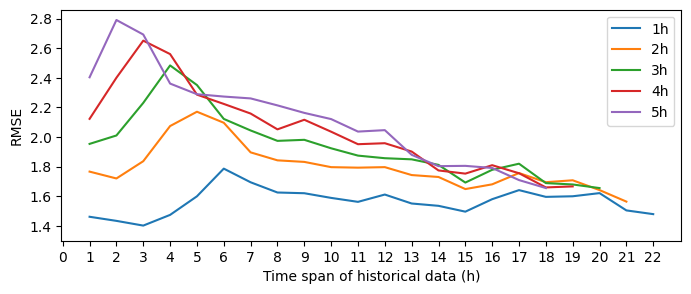

In [16]:
df11 = pd.DataFrame(np.array(rmse)[:,:5])
df11.index = pd.Series(range(23, 23 - df11.shape[0], -1))
df11.columns = [str(x) + "h" for x in range(1, df11.shape[1] + 1)]

plot = df11.plot(figsize=(8, 3))
plot.set_xlabel("Time span of historical data (h)")
plot.set_ylabel("RMSE")
plot.set_xticks(range(23))
# plot.set_title("Quanzhou Prediction")

plot.set_ylim(1.3)

plt.savefig("quanzhou_rmse.png")

<Figure size 600x500 with 0 Axes>

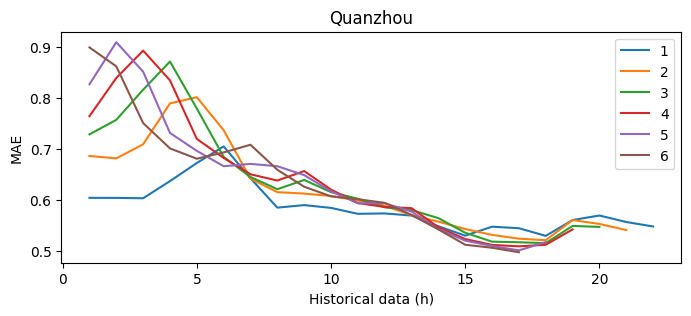

In [18]:
df11 = pd.DataFrame(np.array(mae)[:,:6])
df11.index = pd.Series(range(23, 23 - df11.shape[0], -1))
df11.columns = range(1, df11.shape[1] + 1)

plt.figure(figsize=(6, 5))

plot = df11.plot(figsize=(8, 3))
plot.set_xlabel("Historical data (h)")
plot.set_ylabel("MAE")
plot.set_title("Quanzhou")

# plot.set_ylim(1.2)
# plt.show()
plt.savefig("quanzhou_mae.png")

In [20]:
file_name = "20200218_test.txt"
# file_name = "20190219_test.txt"
# file_name = "20191002.txt"
text = open("../dataset/quanzhou/od_flow/" + file_name, "r").read()
split_data = text.split("\n")[:-1]

pre = 93
round_truth = [x.split('\t') for x in split_data]
cnt_round_truth = Counter()
for x in round_truth:
    cnt_round_truth[x[pre - 2] + "To" + x[pre + 2]] += 1

In [21]:
text1 = open("../predict/quanzhou/" + str(pre) + "/" + file_name, "r").read()
split_data = text1.split("\n")[:-1]

predict_data = [x.split() for x in split_data]
cnt_predict = Counter()
for x in predict_data:
    cnt_predict[x[pre - 2] + "To" + x[pre + 2]] += 1

In [23]:
s = 0
for k, v in cnt_round_truth.items():
    if k not in cnt_predict:
        continue
    s += (abs(v - cnt_predict[k])) ** 2

In [25]:
rmse2 = []
mae2 = []
for pre in range(93, 28, -4):
    # file_name = "20190219_test.txt"
    file_name = "20191002.txt"
    # file_name = "20200218_test.txt"
    text = open("../dataset/quanzhou/od_flow/" + file_name, "r").read()
    split_data = text.split("\n")[:-1]


    round_truth = [x.split('\t') for x in split_data]
    cnt_round_truth = Counter()
    for x in round_truth:
        cnt_round_truth[x[pre - 2] + "To" + x[pre + 2]] += 1
        
    text1 = open("../predict/quanzhou/" + str(pre) + "/" + file_name, "r").read()
    split_data = text1.split("\n")[:-1]

    predict_data = [x.split() for x in split_data]
    cnt_predict = Counter()
    for x in predict_data:
        cnt_predict[x[pre - 2] + "To" + x[pre + 2]] += 1
        
    s = 0
    a = 0
    for k, v in cnt_round_truth.items():
        if k not in cnt_predict:
            continue
        s += (abs(v - cnt_predict[k])) ** 2
        a += abs(v - cnt_predict[k])
        
    rmse2.append((s / len(cnt_round_truth)) ** 0.5)
    mae2.append(a / len(cnt_round_truth))

In [147]:
rmse, mae = [], []

file_name = "20200218_test.txt"
# file_name = "20191002.txt"
text = open("../dataset/quanzhou/od_flow/" + file_name, "r").read()
split_data = text.split("\n")[:-1]
round_truth = [x.split('\t') for x in split_data]

for pre in range(93, 28, -4):
    cnt_round_truth = Counter()
    for x in round_truth:
        cnt_round_truth[x[pre - 2] + "To" + x[pre + 2]] += 1
    
    text1 = open("../predict/quanzhou/" + str(pre) + "/" + file_name, "r").read()
    split_data = text1.split("\n")[:-1]

    predict_data = [x.split() for x in split_data]
    cnt_predict = Counter()
    for x in predict_data:
        cnt_predict[x[pre - 2] + "To" + x[pre + 2]] += 1
        
    s = 0
    a = 0
    for k, v in cnt_round_truth.items():
        if k not in cnt_predict:
            continue
        s += (abs(v - cnt_predict[k])) ** 2
        a += abs(v - cnt_predict[k])
        
    rmse.append((s / len(cnt_round_truth)) ** 0.5)
    mae.append(a / len(cnt_round_truth))

In [150]:
rmse1, mae1 = [], []

text = open("../dataset/quanzhou/od_flow/" + file_name, "r").read()
split_data = text.split("\n")[:-1]
round_truth = [x.split('\t') for x in split_data]

for pre in range(93, 28, -4):
    cnt_round_truth = Counter()
    for x in round_truth:
        cnt_round_truth[x[pre - 2] + "To" + x[pre + 2]] += 1
    
    text1 = open("../predict/quanzhou1/" + str(pre) + "/" + file_name, "r").read()
    split_data = text1.split("\n")[:-1]

    predict_data = [x.split() for x in split_data]
    cnt_predict = Counter()
    for x in predict_data:
        cnt_predict[x[pre - 2] + "To" + x[pre + 2]] += 1
        
    s = 0
    a = 0
    for k, v in cnt_round_truth.items():
        if k not in cnt_predict:
            continue
        s += (abs(v - cnt_predict[k]) * 1) ** 2
        a += abs(v - cnt_predict[k])
        
    rmse1.append((s / len(cnt_round_truth)) ** 0.5)
    mae1.append(a / len(cnt_round_truth))

<Axes: >

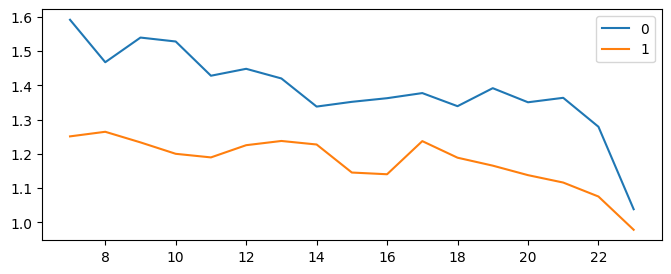

In [152]:
df1 = pd.DataFrame({0:rmse, 1:rmse1})
df1.index = pd.Series(range(23, 23 - len(df1), -1))
df1.plot(figsize=(8, 3))

<Axes: >

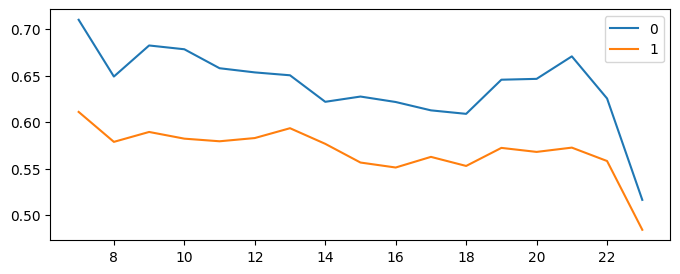

In [153]:
df2 = pd.DataFrame({0:mae, 1:mae1})
df2.index = pd.Series(range(23, 23 - len(df1), -1))
df2.plot(figsize=(8, 3))

In [156]:
df3 = df1.copy()
df4 = df2.copy()

Text(0.5, 1.0, 'National Day')

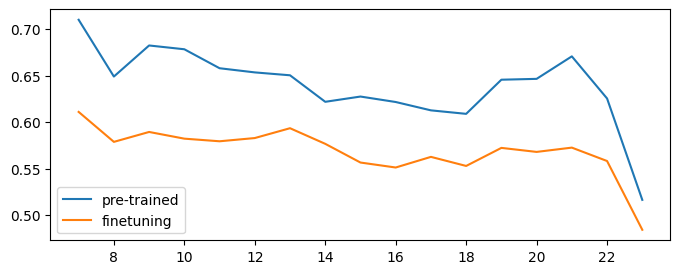

In [161]:
df2.columns = ["pre-trained", "finetuning"]
df2.plot(figsize=(8, 3))
plot.set_title("National Day")

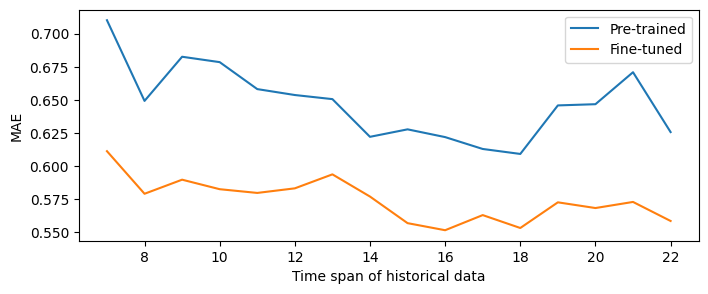

In [162]:
df4.columns = ["Pre-trained", "Fine-tuned"]
df4.iloc[1:].plot(figsize=(8, 3), xlabel="Time span of historical data", ylabel="MAE")
# plot.set_title("the Lantern Festival")
plt.savefig("quanzhou_festival_mae.png")

In [ ]:
df5 = df4.copy()

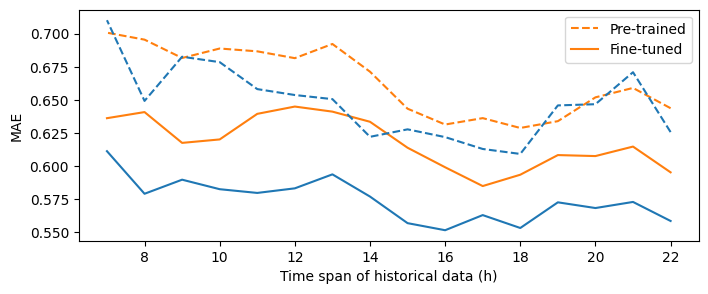

In [166]:
import matplotlib.pyplot as plt

ax = df5.iloc[1:].plot(figsize=(8, 3), xlabel="Time span of historical data (h)", ylabel="MAE", style=["--", "-"], color=['#ff7f0e'])

df2.iloc[1:].plot(ax=ax, style=["--", "-"], color=['#1f77b4'])

legend_labels = ['Pre-trained', 'Fine-tuned']
ax.legend(legend_labels)